#Entrega final

#Importar librerias

In [4]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


In [5]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sb
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt

#Visulizacíon de calidad de datos

In [6]:
df=pd.read_csv("/content/drive/MyDrive/Semana tec 2/Analisis covid/country_wise_latest.csv")

In [ ]:
df.describe()

In [ ]:
df.info()

#Procesar datos

In [7]:
newDF = df[['Country/Region','Deaths', 'Recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered']].copy()
display(newDF)

,Country/Region,Deaths,Recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered
0,Afghanistan,1269,25198,3.50,69.49,5.04
1,Albania,144,2745,2.95,56.25,5.25
2,Algeria,1163,18837,4.16,67.34,6.17
3,Andorra,52,803,5.73,88.53,6.48
4,Angola,41,242,4.32,25.47,16.94
...,...,...,...,...,...,...
182,West Bank and Gaza,78,3752,0.73,35.33,2.08
183,Western Sahara,1,8,10.00,80.00,12.50
184,Yemen,483,833,28.56,49.26,57.98
185,Zambia,140,2815,3.08,61.84,4.97


#Creación de clusters Post-procesamiento

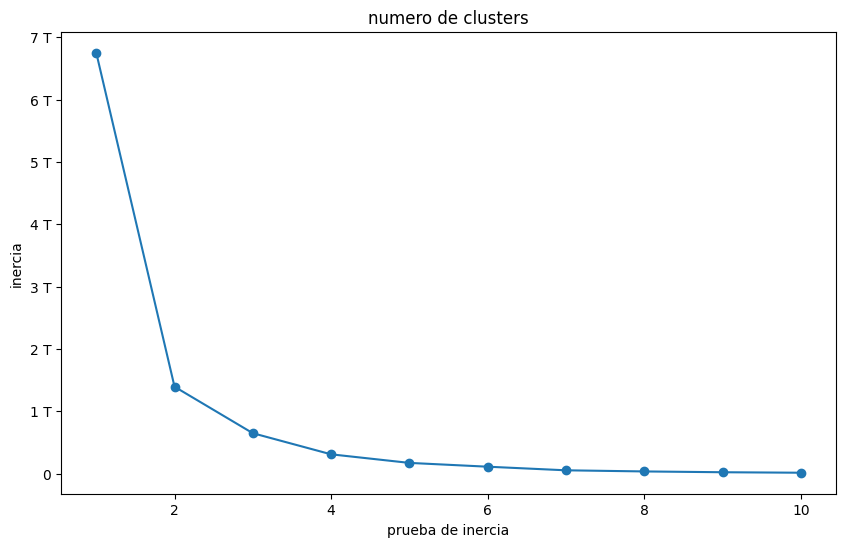

In [8]:
#Calcular el numero de clusters y plotearlos
inertia = []
#Se convierte el data frame a valores numericos
newDF_num = newDF.drop('Country/Region', axis=1)

#Quitar infinitos
DF_num= newDF_num.replace([float('inf'), float('-inf')], float('nan')).dropna()

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(DF_num)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("prueba de inercia")
plt.ylabel('inercia')
plt.title('numero de clusters')

# Import EngFormatter
from matplotlib.ticker import EngFormatter

# Apply EngFormatter to the y-axis
plt.gca().yaxis.set_major_formatter(EngFormatter(unit=''))


plt.show()

### Aplicar KMeans

In [9]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

DF_procesado= DF_num.replace([float('inf'), float('-inf')], float('nan')).dropna()

# Fit and predict on the dataframe without NaNs
cluster_labels = kmeans.fit_predict(DF_procesado)

# Create a new DataFrame with the numerical data and cluster labels
clustered_df = DF_procesado.copy()
clustered_df['Cluster'] = cluster_labels

display(clustered_df)

,Deaths,Recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Cluster
0,1269,25198,3.50,69.49,5.04,2
1,144,2745,2.95,56.25,5.25,2
2,1163,18837,4.16,67.34,6.17,2
3,52,803,5.73,88.53,6.48,2
4,41,242,4.32,25.47,16.94,2
...,...,...,...,...,...,...
182,78,3752,0.73,35.33,2.08,2
183,1,8,10.00,80.00,12.50,2
184,483,833,28.56,49.26,57.98,2
185,140,2815,3.08,61.84,4.97,2


### Visualizar clusters

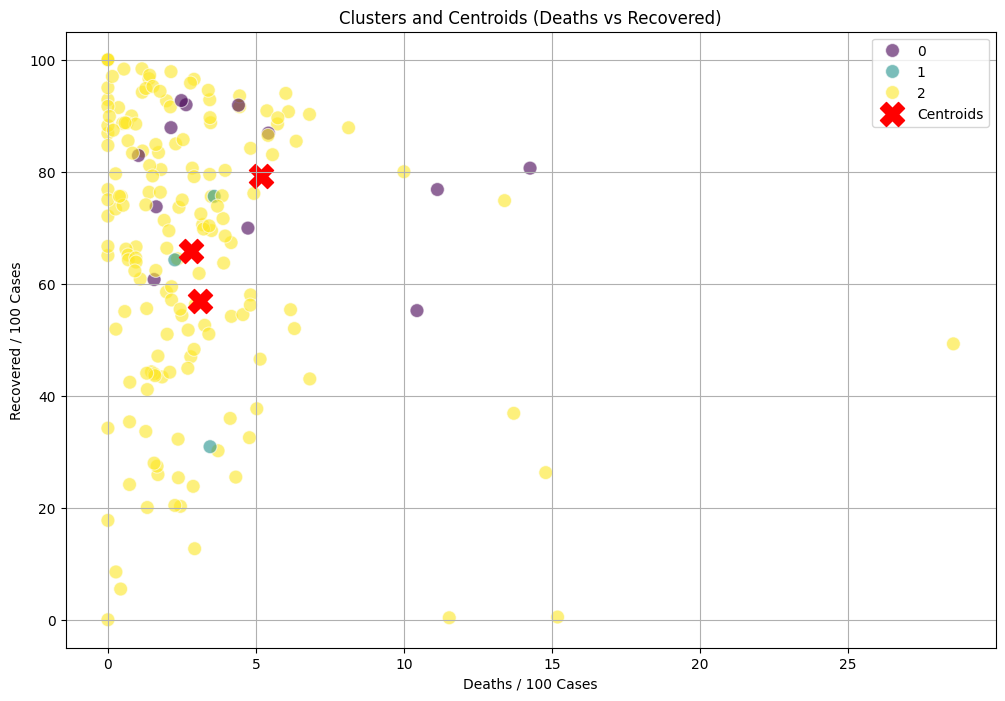

In [10]:
plt.figure(figsize=(12, 8))

# Scatter plot of the data points, colored by cluster
sb.scatterplot(data=clustered_df, x='Deaths / 100 Cases', y='Recovered / 100 Cases', hue='Cluster', palette='viridis', s=100, alpha=0.6)

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='red', marker='X', label='Centroids')

plt.title('Clusters and Centroids (Deaths vs Recovered)')
plt.xlabel('Deaths / 100 Cases')
plt.ylabel('Recovered / 100 Cases')
plt.legend()
plt.grid(True)
plt.show()

#Interpretar la información

In [11]:
#Juntar los df
clustered_countries_df = pd.merge(df[['Country/Region']], clustered_df, left_index=True, right_index=True)

for cluster_id in range(n_clusters):
    countries_in_cluster = clustered_countries_df[clustered_countries_df['Cluster'] == cluster_id]['Country/Region'].tolist()
    print(f"Cluster {cluster_id}:")
    print(countries_in_cluster)
    print("-" * 30)

Cluster 0:
['Chile', 'Germany', 'Iran', 'Italy', 'Mexico', 'Pakistan', 'Peru', 'Russia', 'Saudi Arabia', 'South Africa', 'Spain', 'Turkey']
------------------------------
Cluster 1:
['Brazil', 'India', 'US']
------------------------------
Cluster 2:
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'F

,Deaths,Recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered
Cluster,,,,,
0,16236.75000,2.701952e+05,5.155000,79.275833,6.904167
1,89679.00000,1.374537e+06,3.100000,56.923333,6.470000
2,1047.42515,1.258762e+04,2.813174,65.864431,43.588922


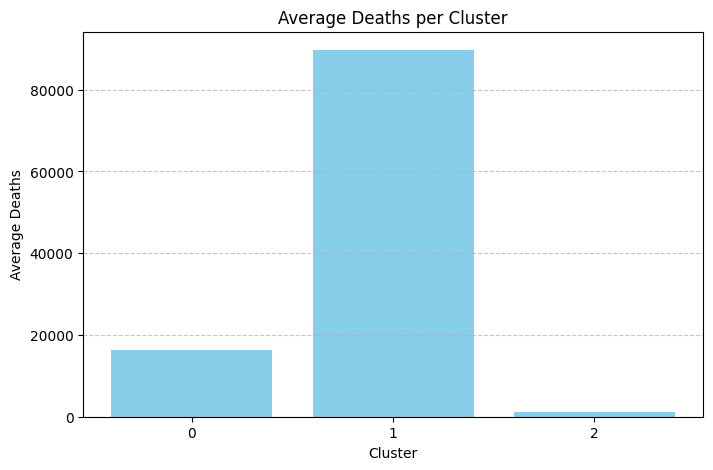

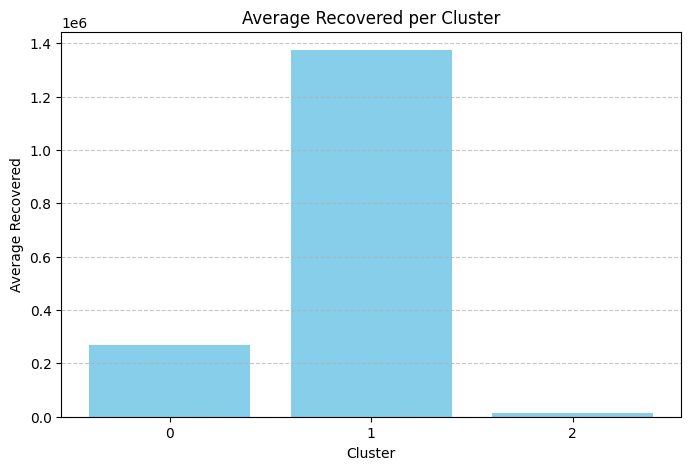

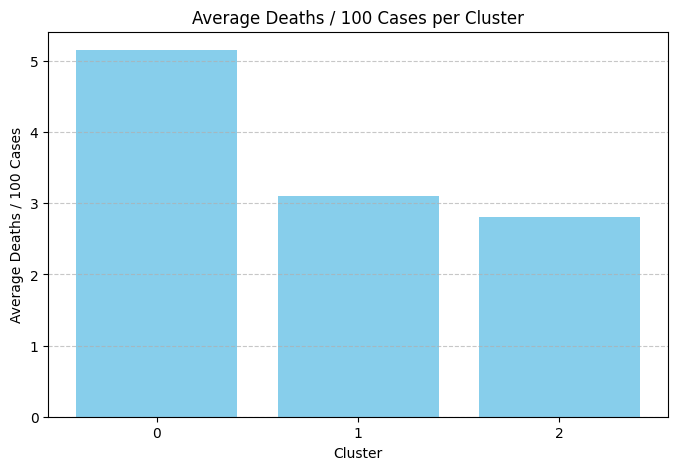

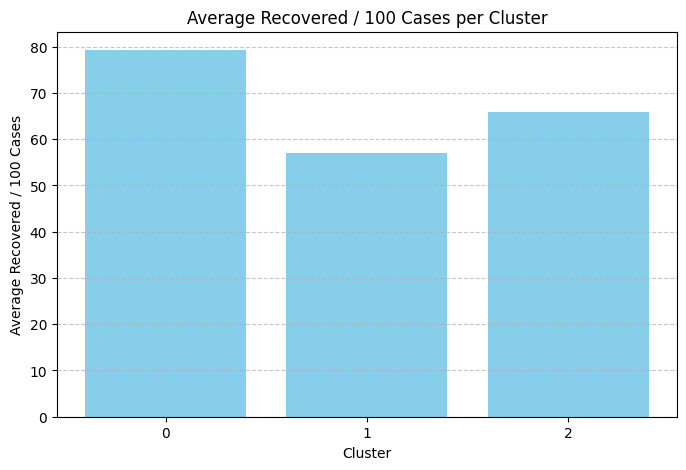

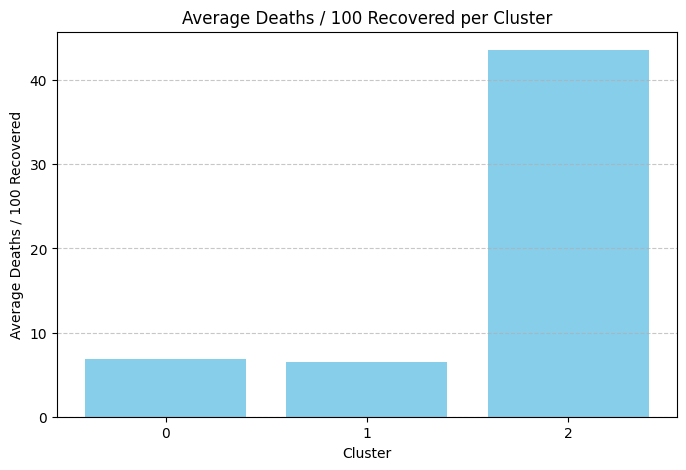

In [13]:
#Calcular el promedio de cada cluster
cluster_means = clustered_df.groupby('Cluster').mean()
display(cluster_means)

#Plotear los promedios por cluster
for column in cluster_means.columns:
    if column != 'Cluster':
        plt.figure(figsize=(8, 5))
        plt.bar(cluster_means.index, cluster_means[column], color='skyblue')
        plt.xlabel('Cluster')
        plt.ylabel(f'Average {column}')
        plt.title(f'Average {column} per Cluster')
        plt.xticks(cluster_means.index)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()